# ENTREGA FINAL: NFL

#### 01 MIAR Python Para la IA

José Luis Calvo Subirá

El objetivo es usar las tecnologías y patrones aprendidos durante el curso para procesar, analizar y visualizar ciertos aspectos del Fútbol Americano. Tras unos análisis generales simples en la sección 3, se dará paso a uno mucho más profundo de la figura del quarterback y su conexión con el receptor. Desde un primer momento se ha intentado hacer uso de los conocimientos impartidos en las clases.

# NFL PASSING STATS (2004 - 2019)
1. [Introducción](#introduction)

2. [IMPORTS](#imports)

3. [Análisis y procesamiento de datos - Passing Stats](#passingStats)
    
    3.1 [Análisis general sobre las jugadas de pase](#passoverview)
    
4. [Análisis y procesamiento de datos - QB Stats](#qbstats)

    4.1 [Tabla estadística QB](#qbclassification)
    
    4.2 [CORRELACIÓN RUSH VS PASSING QB](#correlation)
    
    4.3 [Análisis sobre la conexión QB - receptores](#qbrec)
    
    4.4 [Mapa representativo de la conexión QB - receptor](#qbrecmap)
    
[ANEXO 1](#anexo)

## 1. Introducción<a name="introduction">

El objetivo de este trabajo es tratar de explorar ciertas tendencias y analizar rasgos del fútbol americano. Es un deporte muy complejo ya que existen decenas de posiciones de jugadores (tanto para la defensa como el ataque), cientos de tipos de jugadas, situaciones específicas, además de un reglamento de lo más extenso. Por estos motivos, los análisis siguientes se centrarán en las jugadas ofensivas de avance por pase. A continuación se detallan brevemente algunos conceptos básicos:
- Una jugada de pase involucra normalmente a un mínimo de dos jugadores, en ocasiones tres:
    - El lanzador, en adelante denominado quarterback (abreviado, QB)
    - El receptor, aquel jugador que avanza en carrera y que trata de recepcionar el balón y ganar yardas
    - Un jugador defensivo, que intentará evitar que el receptor recoja el balón.
- Se contemplan 5 posibles resultados de la jugada:
    - Pase incompleto: el receptor no logra controlar el balón
    - Pase completo: el receptor controla el balón
    - Intercepción: el defensa captura el balón, el ataque pierde la posesión
    - Sack: el QB es placado antes de lanzar el balón
    - Touchdown: el receptor finaliza la jugada de pase en la zona de anotación

Se ha escogido una fuente de datos disponible en https://www.kaggle.com/datasets/toddsteussie/nfl-play-statistics-dataset-2004-to-present?resource=download&select=plays.csv. Se han descomprimido los archivos en una carpeta llamada 'archive'. Es necesario estar registrado en la plataforma Kaggle por lo que no puede descargarse en código.

Este conjunto de datos parece bastante completo, con un total de 20 datasets y 309 columnas que recogen todos los partidos desde la temporada 2004 hasta la temporada 2019. A lo largo del trabajo se usarán los siguientes datasets:
- passer.csv -> jugadas de pase
- receiver.csv -> jugadas de recepción
- rusher.csv -> Jugadas de avance por tierra
- plays.csv -> Recoge cada una de las jugadas que han tenido lugar entre 2004 y 2019
- players.csv -> Almacena todos los jugadores dados de alta entre 2004 y 2019
- games.csv -> Información sobre los partidos

Cada una de estas tablas consta de una clave primaria para identificar todos sus elementos. Por otra parte, varias de estas tablas se relacionan con otras a través de claves foráneas. Comprender adecuadamente estas relaciones así como la información que contienen es importante antes de comenzar con el procesamiento de datos.

PASSER.CSV
- passerId: Identificador único
- playId: Clave foránea asociada con la jugada
- playerId: Clave foránea asociada con el jugador

RECEIVER.CSV
- receiverId: Identificador único
- playId: Clave foránea asociada con la jugada
- playerId: Clave foránea asociada con el jugador

RUSHER.CSV
- rushId: Identificador único
- playId: Clave foránea asociada con la jugada
- playerId: Clave foránea asociada con el jugador

PLAYERS.CSV
- playerId: Identificador único del jugador

GAMES.CSV
- gameId: Identificador único del partido

PLAYS.CSV
- playId: Identificador único de la jugada
- gameId: Clave foránea asociada con el partido

El resto de columnas de cada tabla está explicado en https://www.kaggle.com/datasets/toddsteussie/nfl-play-statistics-dataset-2004-to-present?resource=download&select=plays.csv. No obstante, se decribirá brevemente el significado y validez de los campos que usen.

Es importante destacar llegados a este punto, que los análisis siguientes se realizarán respecto a las temporadas: 2004, 2005, 2006, 2007, 2010, 2014, 2017, 2019. El motivo reside en la falta de datos sobre las jugadas de recepción (receiver.csv) para el resto de temporadas [ANEXO-1](#anexo1)

## 2. Imports<a name="imports">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import seaborn as sns

In [2]:
folder = 'archive'

## 3. Análisis y procesamiento de datos - Passing Characteristics<a name="passingStats">

### 3.1 Análisis general sobre las jugadas de pase<a name="passoverview">

En primer lugar importamos el conjunto de datos de **passer.csv** como un DataFrame de Pandas, para inmediatamente después comprobar el estado de los datos.

In [3]:
path_passer = path.join(folder, 'passer.csv')
passer_df = pd.read_csv(path_passer, sep=',', index_col=0)

In [4]:
passer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397265 entries, 15154145 to 212589
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   playId         397265 non-null  int64 
 1   teamId         397265 non-null  int64 
 2   playerId       397265 non-null  int64 
 3   passPosition   397265 non-null  object
 4   passOutcomes   397265 non-null  object
 5   passDirection  327142 non-null  object
 6   passDepth      324935 non-null  object
 7   passLength     397265 non-null  int64 
 8   passAtt        397265 non-null  int64 
 9   passComp       397265 non-null  int64 
 10  passTd         397265 non-null  int64 
 11  passInt        397265 non-null  int64 
 12  passIntTd      397265 non-null  int64 
 13  passSack       397265 non-null  int64 
 14  passSackYds    397265 non-null  int64 
 15  passHit        397265 non-null  int64 
 16  passDef        397265 non-null  int64 
 17  passNull       397265 non-null  int64 
dt

LLama la atención la existencia de valores nulos en columnas como 'passDirection' y 'passDepth'.

In [5]:
passer_df.describe(include='all')

,playId,teamId,playerId,passPosition,passOutcomes,passDirection,passDepth,passLength,passAtt,passComp,passTd,passInt,passIntTd,passSack,passSackYds,passHit,passDef,passNull
count,3.972650e+05,397265.000000,3.972650e+05,397265,397265,327142,324935,397265.000000,397265.000000,397265.000000,397265.000000,397265.000000,397265.000000,397265.000000,397265.000000,397265.000000,397265.000000,397265.000000
unique,NaN,NaN,NaN,26,4,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,QB,complete,right,short,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,396545,223548,132839,261863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.760735e+06,2521.278001,2.006086e+07,NaN,NaN,NaN,NaN,7.082945,0.936506,0.562718,0.038350,0.025187,0.002663,0.063494,-0.408629,0.059842,0.058289,0.038340
std,4.574535e+06,1378.035734,6.395508e+04,NaN,NaN,NaN,NaN,9.815828,0.243850,0.496052,0.192039,0.156694,0.051538,0.243850,1.810722,0.237194,0.234289,0.192015
min,3.000000e+00,200.000000,1.985028e+07,NaN,NaN,NaN,NaN,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.000000,0.000000,0.000000,0.000000
25%,4.017573e+06,1400.000000,2.002008e+07,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.019945e+06,2510.000000,2.005025e+07,NaN,NaN,NaN,NaN,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.200938e+07,3430.000000,2.011004e+07,NaN,NaN,NaN,NaN,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Puede apreciarse en el output del método 'describe' que existen jugadores pertenecientes a distintas posisciones que han relaizado pases en algún momento. Como el objetivo de este trabajo es centrarse en los QB, procedemos a eliminar aquellas jugadas no realizadas por un quarterback.

Respecto a las columnas 'passDirection' y 'passDepth', no sería adecuado eliminar aquellas filas con valores nulos puesto que contienen otra información muy útil (touchdown, resultado del pase, etc). Por consiguiente, reemplazamos el valor 'NaN' de dichas columnas por 'unknown'.

Además, el campo 'passNull' indica si la jugada fue posteriormente anulada por alguna violación del reglamento. Estas jugadas no contabilizan en las estadísticas finales de los jugadores, por lo que también eliminamos las filas con ''passNull igual a 1 (se trata de un campo binario, según la documentación de la fuente de datos).

In [6]:
# jugadas de pase con valor nulo en passDepth
passer_df[pd.isnull(passer_df['passDepth'])].sample(3)

,playId,teamId,playerId,passPosition,passOutcomes,passDirection,passDepth,passLength,passAtt,passComp,passTd,passInt,passIntTd,passSack,passSackYds,passHit,passDef,passNull
passId,,,,,,,,,,,,,,,,,,
9214911,9031319,3900,20040011,QB,incomplete,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0
13117699,13023230,4900,20150001,QB,sack,NaN,NaN,0,0,0,0,0,0,1,-5,0,0,0
206391,15846,1400,19970042,QB,sack,NaN,NaN,0,0,0,0,0,0,1,-9,1,0,0


In [7]:
# eliminamos jugadas realizadas por jugadores que no sean QBs
passer_df.drop(passer_df[passer_df['passPosition'] != 'QB'].index, inplace=True)

# Sustituimos los valores nulos de passDirection por unknown
passer_df.loc[pd.isna(passer_df['passDirection']), 'passDirection'] = 'unknown'

# Sustituimos los valores nulos de passDepth por unknown
passer_df.loc[pd.isna(passer_df['passDepth']), 'passDepth'] = 'unknown'

# Eliminamos las jugadas de pase con passNull = 1, puesto que son jugadas anuladas posteriormente por una falta
passer_df.drop(passer_df[passer_df['passNull'] == 1].index, inplace=True)

In [8]:
passer_df.describe(include='all')

,playId,teamId,playerId,passPosition,passOutcomes,passDirection,passDepth,passLength,passAtt,passComp,passTd,passInt,passIntTd,passSack,passSackYds,passHit,passDef,passNull
count,3.813510e+05,381351.000000,3.813510e+05,381351,381351,381351,381351,381351.000000,381351.000000,381351.000000,381351.000000,381351.000000,381351.000000,381351.000000,381351.000000,381351.000000,381351.000000,381351.0
unique,NaN,NaN,NaN,1,4,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,QB,complete,right,short,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,381351,218550,126432,251975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.660591e+06,2522.127843,2.005981e+07,NaN,NaN,NaN,NaN,6.891263,0.936072,0.573094,0.038731,0.025226,0.002683,0.063928,-0.412156,0.059381,0.058293,0.0
std,4.591985e+06,1377.865757,6.404345e+04,NaN,NaN,NaN,NaN,9.651061,0.244625,0.494629,0.192953,0.156811,0.051724,0.244625,1.816180,0.236337,0.234297,0.0
min,3.000000e+00,200.000000,1.985028e+07,NaN,NaN,NaN,NaN,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.000000,0.000000,0.000000,0.0
25%,4.009188e+06,1400.000000,2.002000e+07,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,8.012155e+06,2510.000000,2.005023e+07,NaN,NaN,NaN,NaN,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.200506e+07,3430.000000,2.011004e+07,NaN,NaN,NaN,NaN,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Se puede realizar un análisis superficial de algunos parámetros a través de un simple gráfico, por ejemplo:
- Resultado ('outcome') de todas las jugadas de pase válidas
- Dirección del pase de todas las jugadas completadas, incompletas e interceptadas
- Profundidad del pase de todas las jugadas completadas, incompletas e interceptadas

Nota: en los dos últimos casos, descartamos las jugadas acabadas en 'sack' puesto que el pase nunca se llega a realizar

In [9]:
#Resultado de la jugada
pass_outcome = passer_df['passOutcomes'].value_counts()

#Nos quedamos con las jugadas que no han acabado en sack
df_no_sacks = passer_df[passer_df['passOutcomes'] != 'sack']

#Profundidad del pase
pass_depth = df_no_sacks['passDepth'].value_counts()

#Dirección del pase
pass_direction = df_no_sacks['passDirection'].value_counts()

In [10]:
def plot_graphic_pie(data, title='title'):
    fig1, ax1 = plt.subplots(figsize =(8, 8))
    wedges, texts, autotexts = ax1.pie(data.values, labels=data.index, autopct='%1.2f%%',
        startangle=90, labeldistance=None, radius=0.8, pctdistance=1.2)
    ax1.set_title(title, fontsize = 16)
    plt.legend(fontsize = 12, loc='best')
    plt.setp(autotexts, size=12)
    plt.show()

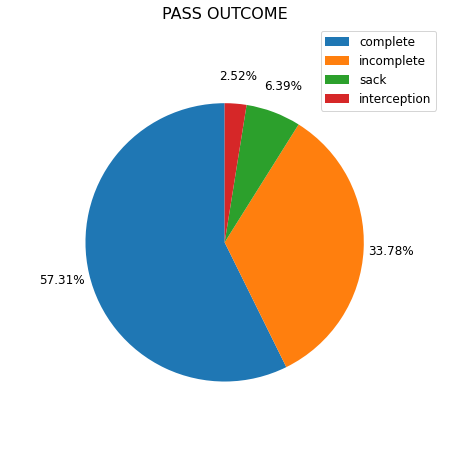

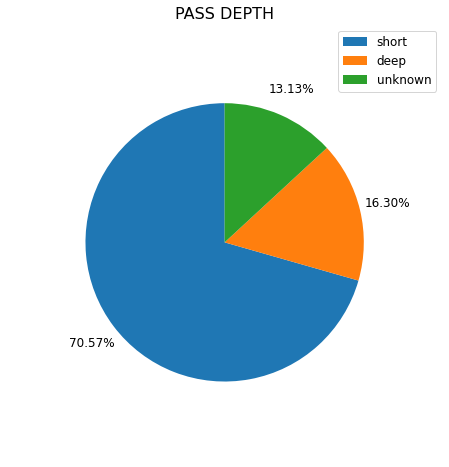

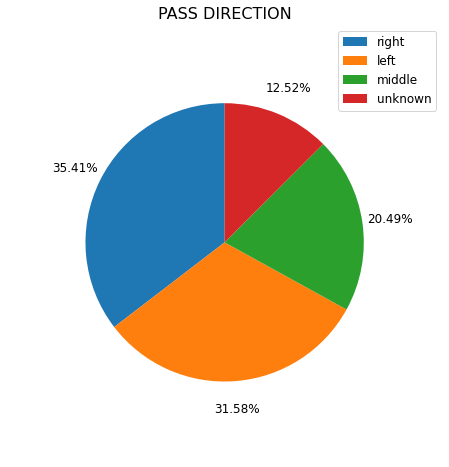

In [11]:
plot_graphic_pie(pass_outcome, 'PASS OUTCOME')
plot_graphic_pie(pass_depth, 'PASS DEPTH')
plot_graphic_pie(pass_direction, 'PASS DIRECTION')

Se puede concluir, observando el gráfico sobre la profundidad de los pases, que en la mayoría de las jugadas de pase se buscan pases en corto. Se denomina pase corto a los lanzamientos en los que el balón vuela menos de 20 yardas, y son frecuentes cuando se pretende realizar una jugada rápida.

Respecto al gráfico sobre la dirección del pase, se puede deducir que los QB ligeramente se decantan más por la derecha (lado natural de pase de los QBs diestros), si bien no es concluyente dado que los unknowns representan un 12.52% del total, nada despreciable.

Sin embargo, podría ser interesante analizar la relación entre la profundidad del pase y su dirección. No sería de extrañar que los pases largos se sucedan hacia el lado natural del QB. En tal caso, deberíamos observar que la mayoría de pases largos son hacia el lado derecho.

In [12]:
# Nos quedamos con todas las jugadas que no tegan 'unknown' como direccion o profundidad del pase
df_dir_depth = df_no_sacks[(df_no_sacks['passDirection'] != 'unknown') & (df_no_sacks['passDepth'] != 'unknown')][['passDepth','passDirection']]
# Agrupamos por dirección de pase para obtener una relación numérica con la profundidad
#
dir_vs_depth = df_dir_depth.groupby(['passDirection']).value_counts().unstack()

display(dir_vs_depth)

passDepth,deep,short
passDirection,,
left,21595,90308
middle,13985,58701
right,22597,102913


In [13]:
def plot_bars(data):
    barWidth = 0.25
    fig, axs = plt.subplots(figsize =(12, 7))
    n = data.shape[0]

    x1 = np.arange(n)
    x2 = [x + barWidth for x in x1]

    # Make the plot
    axs.bar(x1, data['deep'], color ='b', width = barWidth,
            edgecolor ='grey', label ='Deep')
    axs.bar(x2, data['short'], color ='r', width = barWidth,
            edgecolor ='grey', label ='Short')
    axs.grid(visible = True, color ='grey',linestyle ='-.')

    # Adding Xticks
    plt.xlabel('Direction', fontweight ='bold', fontsize = 16)
    plt.ylabel('Depth', fontweight ='bold', fontsize = 16)
    plt.xticks([r + barWidth/2 for r in range(n)],data.index)
    plt.legend(fontsize=16)
    plt.show()
    return

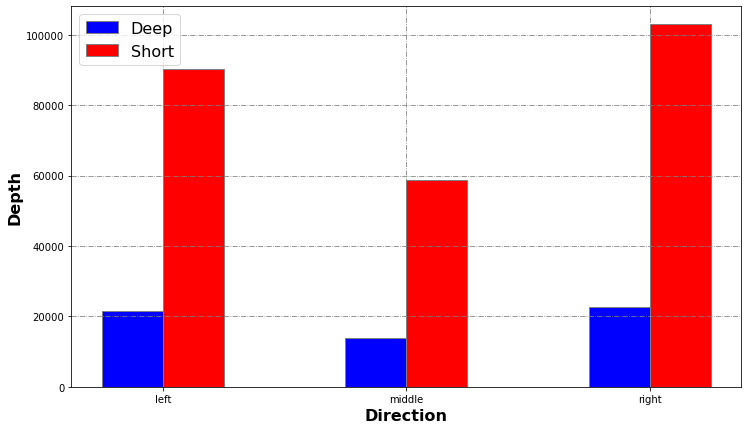

In [14]:
plot_bars(dir_vs_depth)

El número de pases profundos (20 yardas o más) lanzados hacia el lado derecho es ligeramente mayor que los lanzados hacia el lado izquierdo. La mayor diferencia se encuentra con los pases porfundos lanzados hacia el centro del campo, muy razonable si se tiene en cuenta el hecho de que los defensas suelen estar más agrupados hacia el centro y, por lo tanto, las probabilidades de interceptar el balón aumentan.

## 4. Análisis y procesamiento de datos - QB Stats<a name="qbstats">

En los próximos apartados se hace un análisis mucho mas exhaustivo a nivel individual de los quarterback que han participado en la NFL entre las temporadas 2004 y 2019

### 4.1 Tabla estadística QB<a name="#qbclassification">

La NFL clasifica los pasadores de acuerdo a los siguientes parámetros:
- **Passing Yards**: yardas completadas en una jugada de pase desde la línea de scrimmage
- **Yards/Attempt**: ratio 'passing yards'/intentos de pase
- **Attempts**: intentos de pase
- **Completions**: pases completados
- **% Completions**: porcentaje de pases completados respecto a los intentados
- **TD**: touchdowns anotados por pase
- **Int**: intercepciones del equipo defensivo
- **Rate**: métrica calculada a partir de **completions, attempts, passing yards, TD, int**
- **1st**: Número de first down conseguidos
- **20+**: Número de jugadas de pase en las que se obtuvo un avance de al menos 20 yardas
- **40+**: Número de jugadas de pase en las que se obtuvo un avance de al menos 40 yardas
- **Longest**: la jugada con más yardas ganadas
- **sack**: Número de 'sacks' recibidos por el QB
- **sack yards**: total yardas perdidas debido a los 'sacks'

In [15]:
# Observamos las columnas que contiene el dataframe ya procesado de passers
passer_df.sample(5)

,playId,teamId,playerId,passPosition,passOutcomes,passDirection,passDepth,passLength,passAtt,passComp,passTd,passInt,passIntTd,passSack,passSackYds,passHit,passDef,passNull
passId,,,,,,,,,,,,,,,,,,
10201759,10003519,920,20110035,QB,complete,right,short,-4,1,1,0,0,0,0,0,0,0,0
4216669,4038772,3700,19990002,QB,incomplete,left,short,11,1,0,0,0,0,0,0,0,1,0
4211720,4027137,2700,20000018,QB,incomplete,middle,deep,18,1,0,0,0,0,0,0,0,0,0
11217250,11036187,3200,20140062,QB,complete,right,short,-5,1,1,0,0,0,0,0,0,0,0
14147052,14076068,3200,20000199,QB,incomplete,right,deep,40,1,0,0,0,0,0,0,0,0,0


La información que podemos extraer del data set de 'passers' sería:
- Attempts
- Completions
- % Completions
- TD
- Int
- sack
- sack yards

Información restante:
- Passing Yards
- 1st
- 20+
- 40+
- Longest
- Rate
- Yards/Attempt

En particular, necesitamos obtener en tablas distintas el total de passing yards, 1st, 20+, 40+ y longest. Dicha información está recogida en otros data sets.
- firstDown como resultado de la jugada (valor binario: 1 se consigue el first down, 0 no se consigue) ---> plays.csv
- Passing yards, 20+, 40+ y longest ---> receiver.csv -> 'recYards'
- Rate depende de las yardas de pase acumuladas:
    - a = (COMP/ATT - 0.3) * 5
    - b = (YDS/ATT - 3) * 0.25
    - c = (TD/ATT) * 20
    - d = 2.375 - (INT/ATT * 25)

donde,

ATT = Attempts,
COMP = Completions,
YDS = Passing yards,
TD = TD,
INT = Int

Si el resultado de alguno de los cáclulos es mayor que 2.375, se iguala a 2.375. Si el resultado es negativo, se iguala a 0.

RATE = (a + b + c + d)/6 * 100


El conjunto de datos receiver.csv únicamente consta de recepciones para los años 2004, 2005, 2006, 2007, 2010, 2014, 2017, 2019 (Apendice). Por ello analizaremos unicamente las temporadas 2004, 2005, 2006, 2007.

#### GAMES DATASET

Cada jugada de pase tiene asignada un 'playId' que representa el identificador único de la jugada en el dataset plays.csv (almacena todas las jugadas que han tenido lugar: pass, rush, kicks, fumbles, etc). A su vez, cada jugada tiene asociado un identificador del partido en el que tuvo lugar, el cual nos permite acceder a la información de cada partido disputado en el dataset de games.csv. En concreto, necesitamos acceder a la temporada en la que se jugó cada partido.

In [16]:
path_games = path.join('archive', 'games.csv')
games_df = pd.read_csv(path_games, sep=',', index_col=0)[['season']]

In [17]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 27167 to 58167
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   season  5308 non-null   int64
dtypes: int64(1)
memory usage: 82.9 KB


In [18]:
games_df.sample(3)

,season
gameId,
55730,2012
57132,2016
54945,2010


Nos quedamos con los partidos disputados durante las temporadas 2004, 2005, 2006, 2007

In [19]:
seasons = [2004, 2005, 2006, 2007]

games_filtered = games_df.drop(games_df[~games_df['season'].isin(seasons)].index)

#### PLAYS DATASET

Importamos ahora el conjunto de datos de todas las jugadas registradas

In [20]:
path_plays = path.join('archive', 'plays.csv')
plays_df = pd.read_csv(path_plays, sep=',', index_col=0)[['gameId', 'firstDown']]

In [21]:
# Comprobamos el estado de los datos
plays_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870384 entries, 30298 to 15088621
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   gameId     870384 non-null  int64
 1   firstDown  870384 non-null  int64
dtypes: int64(2)
memory usage: 19.9 MB


#### MERGE PASSER Y PLAYS DATASETS

In [22]:
#Realizamos el merge hacia la izquierda ya que esxisten muchos más tipos de jugada que las de pase
#Usamos la columna 'playdId' del dataset de passers y el index del dataset de plays
pass_plays = passer_df.merge(plays_df, left_on='playId', right_index=True, how='left')

In [23]:
#Comprobamos que la operación se ha realizado bien, sin perder ninguna jugada de pase
pass_plays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381351 entries, 15154145 to 212589
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   playId         381351 non-null  int64 
 1   teamId         381351 non-null  int64 
 2   playerId       381351 non-null  int64 
 3   passPosition   381351 non-null  object
 4   passOutcomes   381351 non-null  object
 5   passDirection  381351 non-null  object
 6   passDepth      381351 non-null  object
 7   passLength     381351 non-null  int64 
 8   passAtt        381351 non-null  int64 
 9   passComp       381351 non-null  int64 
 10  passTd         381351 non-null  int64 
 11  passInt        381351 non-null  int64 
 12  passIntTd      381351 non-null  int64 
 13  passSack       381351 non-null  int64 
 14  passSackYds    381351 non-null  int64 
 15  passHit        381351 non-null  int64 
 16  passDef        381351 non-null  int64 
 17  passNull       381351 non-null  int64 
 1

#### MERGE GAMES DATASET

Ahora, necesitamos añadir el campo 'season' a nuestro dataset para poder filtrar por las temporadas deseadas.

In [24]:
#Realizamos un inner merge ya que el dataframe games_df ya está filtrado por temporadas
#Usamos la columna 'gameId' del dataset de pass_plays y el index del dataset de games
season_pass_plays = pass_plays.merge(games_filtered, left_on='gameId', right_index=True, how='inner')

In [25]:
season_pass_plays.info()

season_pass_plays.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91469 entries, 3213428 to 212589
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   playId         91469 non-null  int64 
 1   teamId         91469 non-null  int64 
 2   playerId       91469 non-null  int64 
 3   passPosition   91469 non-null  object
 4   passOutcomes   91469 non-null  object
 5   passDirection  91469 non-null  object
 6   passDepth      91469 non-null  object
 7   passLength     91469 non-null  int64 
 8   passAtt        91469 non-null  int64 
 9   passComp       91469 non-null  int64 
 10  passTd         91469 non-null  int64 
 11  passInt        91469 non-null  int64 
 12  passIntTd      91469 non-null  int64 
 13  passSack       91469 non-null  int64 
 14  passSackYds    91469 non-null  int64 
 15  passHit        91469 non-null  int64 
 16  passDef        91469 non-null  int64 
 17  passNull       91469 non-null  int64 
 18  gameId         9146

,playId,teamId,playerId,passPosition,passOutcomes,passDirection,passDepth,passLength,passAtt,passComp,...,passInt,passIntTd,passSack,passSackYds,passHit,passDef,passNull,gameId,firstDown,season
passId,,,,,,,,,,,,,,,,,,,,,
2217706,2041421,3300,20010032,QB,incomplete,left,deep,20,1,0,...,0,0,0,0,0,0,0,28996,0,2006
208129,19904,2120,20020001,QB,complete,unknown,unknown,0,1,1,...,0,0,0,0,0,0,0,27153,0,2004
207143,17627,1540,20020003,QB,sack,unknown,unknown,0,0,0,...,0,0,1,-10,0,0,0,26943,0,2004


El campo firstDown ha sido añadido a nuestro dataset. También tenenmos solamente las jugadas de pase realizadas entre 2004 y 2007. Para obtener el resto de propiedades debemos relacionar el identificador de la jugada de nuestro dataset con el dataset 'receiver.csv'. 

In [26]:
path_receiver = path.join('archive', 'receiver.csv')
receiver_df = pd.read_csv(path_receiver, sep=',', index_col=0)

Tal y como se ha explicado anteriormente, los datos de 'receiver.csv' son incompletos y algunos están duplicados. Antes de realizar operaciones con otros datasets, ejecutamos un eliminado de duplicados.

In [27]:
receiver_df.drop_duplicates(subset='playId',inplace=True)

In [28]:
receiver_df.info()
receiver_df.sample()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182557 entries, 15235157 to 262150
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   playId       182557 non-null  int64 
 1   teamId       182557 non-null  int64 
 2   playerId     182557 non-null  int64 
 3   recPosition  182557 non-null  object
 4   recYards     182557 non-null  int64 
 5   rec          182557 non-null  int64 
 6   recYac       182557 non-null  int64 
 7   rec1down     182557 non-null  int64 
 8   recFumble    182557 non-null  int64 
 9   recPassDef   182557 non-null  int64 
 10  recPassInt   182557 non-null  int64 
 11  recEnd       182557 non-null  object
 12  recNull      182557 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 19.5+ MB


,playId,teamId,playerId,recPosition,recYards,rec,recYac,rec1down,recFumble,recPassDef,recPassInt,recEnd,recNull
receiverId,,,,,,,,,,,,,
266152,40043,3700,20020495,RB,1,1,0,0,0,0,0,in bounds,0


Tan solo 'playdId' (la clave foránea que une los lanzamientos de pase con las recepciones) y 'recYards' (necesario para la tabla calsificatoria) son útiles para nuestro análisis

In [29]:
receiver_df = receiver_df[['playId', 'recYards']]

In [30]:
season_pass_plays_complete = season_pass_plays.merge(receiver_df, on='playId', how='left')

In [31]:
season_pass_plays_complete.info()
season_pass_plays_complete.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91469 entries, 0 to 91468
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   playId         91469 non-null  int64  
 1   teamId         91469 non-null  int64  
 2   playerId       91469 non-null  int64  
 3   passPosition   91469 non-null  object 
 4   passOutcomes   91469 non-null  object 
 5   passDirection  91469 non-null  object 
 6   passDepth      91469 non-null  object 
 7   passLength     91469 non-null  int64  
 8   passAtt        91469 non-null  int64  
 9   passComp       91469 non-null  int64  
 10  passTd         91469 non-null  int64  
 11  passInt        91469 non-null  int64  
 12  passIntTd      91469 non-null  int64  
 13  passSack       91469 non-null  int64  
 14  passSackYds    91469 non-null  int64  
 15  passHit        91469 non-null  int64  
 16  passDef        91469 non-null  int64  
 17  passNull       91469 non-null  int64  
 18  gameId

,playId,teamId,playerId,passPosition,passOutcomes,passDirection,passDepth,passLength,passAtt,passComp,...,passIntTd,passSack,passSackYds,passHit,passDef,passNull,gameId,firstDown,season,recYards
29033,2036276,2520,19990131,QB,complete,left,short,7,1,1,...,0,0,0,0,0,0,29107,1,2006,14.0
77509,43642,4400,20010032,QB,sack,unknown,unknown,0,0,0,...,0,1,-5,0,0,0,27114,0,2004,NaN
20109,3033167,2100,20060003,QB,incomplete,right,short,15,1,0,...,0,0,0,0,0,0,29242,0,2007,0.0


El campo 'recYards' tiene algunos valores nulos, puesto que en las jugadas que acaban en 'sack' no llega a producirse ningún lanzamiento, lo que quiere decir que dicha jugada no estaba registrada como recepción en el dataset receiver.csv. Sin embargo, estas jugadas aportan información válida para la tabla clasificatoria final, de modo que simplemente sustituimos los valores NaN por 0.

Además procedemos a eliminar las columnas cuyos valores no son necesarios para completar la clasificación de los quarterbacks

In [32]:
#Como son los únicos valores NaN de todo el dataset, usamos fillna
season_pass_plays_complete.fillna(0, inplace=True)

def drop_columns(data, columns):
    data.drop(columns, axis = 1, inplace=True)
columns_to_drop = ['teamId', 'passOutcomes', 'passDirection', 'passDepth', 'passIntTd', 'passHit', 'passDef', 'passNull','passPosition', 'passLength', 'gameId']
drop_columns(season_pass_plays_complete, columns_to_drop)

In [33]:
season_pass_plays_complete.sample(5)

,playId,playerId,passAtt,passComp,passTd,passInt,passSack,passSackYds,firstDown,season,recYards
63198,1050785,19940197,1,0,0,0,0,0,0,2005,0.0
64354,1021841,20020001,1,1,0,0,0,0,0,2005,-2.0
17305,3042814,19990011,1,0,0,1,0,0,0,2007,0.0
18393,3023097,19940500,1,1,1,0,0,0,1,2007,3.0
5126,3013446,19980001,1,1,0,0,0,0,1,2007,28.0


Añadimos ahora las columnas para el número total de pases de más de 20 y 40 yardas respectivamente. Usamos valores binarios (1 o 0) para poder contabilizar el número total con una simple suma en el siguiente paso. En cuanto a la jugada con más yardas ganadas para cada QB, agrupamos por 'playerId' y obtenemos el máximo valor de la columna 'recYards'

In [34]:
#Añadimos un valor binario, 1 si el pase resultó en una ganacia de 20 o más yardas, 0 en caso contrario
season_pass_plays_complete['20plus'] = (season_pass_plays_complete['recYards'] >= 20).astype(int)
#Añadimos un valor binario, 1 si el pase resultó en una ganacia de 40 o más yardas, 0 en caso contrario
season_pass_plays_complete['40plus'] = (season_pass_plays_complete['recYards'] >= 40).astype(int)
#Agrupamos por jugador y obtenemos el valor máximo del campo recYards
longest = season_pass_plays_complete.groupby(['playerId'])[['recYards']].max()
longest.rename(columns={'recYards': 'longest'}, inplace=True)

Llevamos a cabo una agrupación por jugador aplicando una suma a cada uno de los campos del dataframe anterior, para obtener el valor acumulado de cada una de las jugadas protagonizadas por cada jugador. Incorporamos los valores de 'longest' al nuevo dataframe, y renombramos todas las columnas para dotarlas de una nomenclatura más representativa.

In [35]:
#Agrupamos por playerId y seleccionamos las columnas de interés
qb_passing = season_pass_plays_complete.groupby('playerId')[['recYards', 'passAtt', 'passComp', 'passTd', 
                                                'passInt', 'firstDown', '20plus', '40plus', 'passSack', 'passSackYds']].sum()

qb_passing = qb_passing.merge(longest, left_on='playerId', right_index=True, how='left')

qb_passing.rename(columns={'recYards': 'passYards', 'passAtt': 'Att', 'passComp': 'Cmp', 'passTd': 'td',
                          'passInt': 'int', 'passSack': 'sack', 'passSackYds': 'sackYards'}, inplace=True)

In [36]:
qb_passing.head(3)

,passYards,Att,Cmp,td,int,firstDown,20plus,40plus,sack,sackYards,longest
playerId,,,,,,,,,,,
19850285,548.0,84,48,3,1,30,6,0,4,-42,29.0
19870001,5768.0,847,498,25,35,274,75,8,58,-354,65.0
19870098,822.0,118,70,4,2,39,9,4,7,-25,58.0


Para completar la clasificación de los quarterbacks es preciso insertar tres columnas más: el ratio yards/att, el porcentaje de pases completados respecto a los intentados y el raitng. También es necesario eliminar del conjunto de datos aquellos jugadores que no hayan intentado ni un solo pase. Serían aquellos juagadores que solamente han sido 'sackeados' en las jugadas en las que han participado.

In [37]:
#Se eliminan del dataframe todos aquellos jugadores que no hayan realizado ni un solo pase  
qb_passing.drop(qb_passing[qb_passing['Att'] == 0].index, inplace=True)

qb_passing['Yards/Att'] = qb_passing['passYards']/qb_passing['Att']
qb_passing['Cmp%'] = round((qb_passing['Cmp']/qb_passing['Att'])*100, 2)

def check(value):
    #Si el resultado es negativo -> 0
    if value < 0:
        return 0
    #Si el resultado es mayor que 2.375 -> 2.375
    if value > 2.375:
        return 2.375
    return value

def calculate_rate(data):
    #calculamos los ratios
    a = (data['Cmp']/data['Att'] - 0.3)*5
    b = (data['passYards']/data['Att'] -3)*0.25
    c = (data['td']/data['Att'])*20
    d = 2.375 - (data['int']/data['Att']* 25)

    #Aplicamos un check a cada uno de los valores de los calculos para limitar su valor si es necesario
    a = a.apply(check)
    b = b.apply(check)
    c = c.apply(check)
    d = d.apply(check)

    #passer rating
    return (a+b+c+d)/6*100

qb_passing['rate'] = calculate_rate(qb_passing)

In [38]:
qb_passing.head(3)

,passYards,Att,Cmp,td,int,firstDown,20plus,40plus,sack,sackYards,longest,Yards/Att,Cmp%,rate
playerId,,,,,,,,,,,,,,
19850285,548.0,84,48,3,1,30,6,0,4,-42,29.0,6.523810,57.14,83.829365
19870001,5768.0,847,498,25,35,274,75,8,58,-354,65.0,6.809917,58.80,72.075462
19870098,822.0,118,70,4,2,39,9,4,7,-25,58.0,6.966102,59.32,84.781073


#### PLAYERS DATASET

Añadimos el nombre de cada QB a través del playerID

In [39]:
path_players = path.join('archive', 'players.csv')
players_df = pd.read_csv(path_players, sep=',', index_col=0)[['nameFull']]

players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23295 entries, 19770001 to 20191200
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nameFull  23295 non-null  object
dtypes: object(1)
memory usage: 364.0+ KB


In [40]:
qb_passing = qb_passing.merge(players_df, how='left', left_index=True, right_index=True)

#### QB CLASSIFICATION

In [41]:
#Establecemos name como index del dataframe (más representativo)
qb_passing.set_index('nameFull', inplace=True)
#Ordenamos de forma descendente respecto a las yardas de pase 
qb_passing.sort_values(by='passYards', ascending=False, inplace=True)

TOP 10 PASSING QB (PASSING YARDS):

In [42]:
qb_passing.head(10)

,passYards,Att,Cmp,td,int,firstDown,20plus,40plus,sack,sackYards,longest,Yards/Att,Cmp%,rate
nameFull,,,,,,,,,,,,,,
Peyton Manning,20460.0,2500,1655,162,58,1064,272,46,83,-529,80.0,8.184000,66.20,103.283333
Tom Brady,20051.0,2648,1690,156,62,1005,246,51,129,-849,73.0,7.572130,63.82,96.700340
Brett Favre,18029.0,2596,1602,112,92,903,211,46,84,-538,90.0,6.944915,61.71,82.060542
Drew Brees,17905.0,2417,1585,116,58,876,226,42,92,-659,88.0,7.407944,65.58,93.596573
Carson Palmer,16410.0,2234,1418,117,67,822,201,46,108,-697,76.0,7.345568,63.47,90.545733
Matt Hasselbeck,16307.0,2301,1406,110,62,840,201,21,145,-879,72.0,7.086919,61.10,87.240149
Marc Bulger,14659.0,1951,1233,79,55,725,194,26,179,-1297,67.0,7.513583,63.20,87.806467
Donovan McNabb,14377.0,1871,1139,99,36,651,187,58,135,-789,91.0,7.684126,60.88,94.451497
Ben Roethlisberger,14240.0,1770,1109,98,71,725,191,36,168,-1100,85.0,8.045198,62.66,89.559793


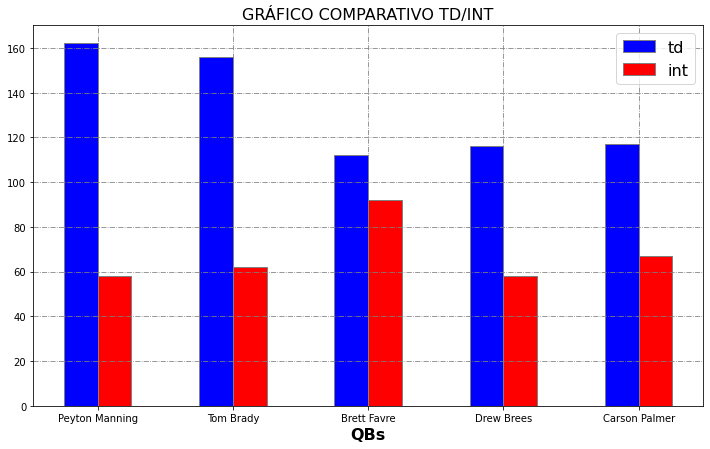

In [43]:
def plot_data(data, columns, title='Title'):
    barWidth = 0.25
    data = data
    fig, axs = plt.subplots(figsize =(12, 7))
    n_players = data.index.size
    c1, c2 = columns
    x1 = np.arange(n_players)
    x2 = [x + barWidth for x in x1]

    # Make the plot
    axs.bar(x1, data[c1], color ='b', width = barWidth,
            edgecolor ='grey', label =c1)
    axs.bar(x2, data[c2], color ='r', width = barWidth,
            edgecolor ='grey', label =c2)
    axs.grid(visible = True, color ='grey',linestyle ='-.')

    # Adding Xticks
    plt.xlabel('QBs', fontweight ='bold', fontsize = 16)
    plt.xticks([r + barWidth/2 for r in range(n_players)],data.index)
    plt.legend(fontsize=16)
    plt.title(title, fontsize=16)
    plt.show()
    
plot_data(qb_passing.head(5), ['td', 'int'], 'GRÁFICO COMPARATIVO TD/INT')

### 4.2 CORRELACIÓN RUSH VS PASSING QB<a name="correlation">

Los quarterbacks pueden ser eficientes en dos competencias distintas: su habilidad para pasar el balón y su condición física para avanzar yardas como si fuesen corredores (es lo que se denomina). Normalmente, las estadísticas descritivas de la competencia pasadora no representan adecuadamente el impacto en el juego de los quarterback que ganan yardas por tierra. Este estudio se ha centrado en las jugadas de pase, pero se va a intentar observar la correlación entre ambas competencias para el conjunto de quarterbacks.

Los datos de las jugadas de tipo 'rush' se encuentran en 'rusher.csv'. Los campos de interés de este dataset para el estudio de la correlación son: rushTd, rushYards, playerId, rushPosition y rushType.

In [44]:
rusher_columns = ['rushTd', 'rushYards', 'playerId', 'rushPosition', 'rushType']
path_rusher = path.join('archive', 'rusher.csv')
rusher_df = pd.read_csv(path_rusher, sep=',', index_col=0)[rusher_columns]

In [45]:
# Eliminamos las jugadas 'rush' no inciadas por un QB
rusher_df.drop(rusher_df[rusher_df['rushPosition'] != 'QB'].index, inplace=True)

#Observamos los distintos tipos de 'rush'
rusher_df['rushType'].value_counts()

qb scramble    12493
rush            9566
kneel           7508
aborted         2122
pass              86
Name: rushType, dtype: int64

'kneel' es cuando el QB hinca la rodilla para aprovecharse del reloj de partido, suelen involucrar la pérdida de 1 yarda aproximadamente, por lo que eliminamos esas jugadas.

In [46]:
#eliminamos jugadas rush de tipo kneel y aborted
rusher_df.drop(rusher_df[rusher_df['rushType'].isin(['kneel', 'aborted'])].index, inplace=True)

#agrupamos por jugador para obtener las sumas totales de TDs y yardas por tierra
qb_rusher = rusher_df.groupby('playerId').sum()

qb_rusher = qb_rusher.merge(players_df, left_index=True, right_index=True, how='left')

qb_rusher.set_index('nameFull', inplace=True)

qb_rusher.sample(3)

,rushTd,rushYards
nameFull,,
Graham Harrell,0.0,21
Brett Ratliff,0.0,33
Ingle Martin,0.0,5


In [47]:
#mergeamos ambos datframes a través del id del jugador
qb_full = qb_passing.merge(qb_rusher, left_index=True, right_index=True, how='left')

In [48]:
qb_full.sort_values('rushYards', ascending=False).head(5)

,passYards,Att,Cmp,td,int,firstDown,20plus,40plus,sack,sackYards,longest,Yards/Att,Cmp%,rate,rushTd,rushYards
nameFull,,,,,,,,,,,,,,,,
Michael Vick,7773.0,1202,659,55,42,384,97,19,138,-880,62.0,6.466722,54.83,75.409040,44.0,6044.0
Aaron Rodgers,1206.0,193,114,8,4,60,10,4,30,-196,85.0,6.248705,59.07,82.523748,26.0,3316.0
Alex Smith,5414.0,928,506,22,35,261,63,12,95,-548,75.0,5.834052,54.53,64.017601,9.0,2911.0
Ryan Fitzpatrick,1554.0,246,141,8,11,83,11,4,18,-104,78.0,6.317073,57.32,68.377371,17.0,2745.0
Jay Cutler,5246.0,697,435,34,20,261,62,10,43,-243,84.0,7.526542,62.41,89.756695,16.0,2102.0


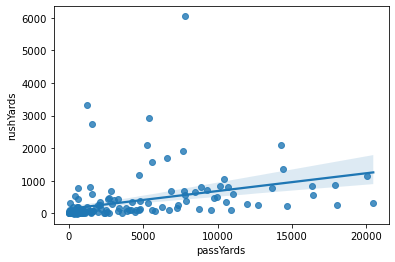

In [49]:
# Seaborn para observar gráficamente la correlación
sns.regplot(x="passYards", y="rushYards", data=qb_full)
plt.show()

Se puede concluir sin lugar a dudas que los quarterbacks que destacan en ampliamente en una habilidad, no son execesivamente buenos en la otra. Ambas cualidades son necesarias en quarterback, pero su mejor cualidad define el tipo de juego ofensivo que el equipo ejecutará. 

### 4.3 Análisis sobre la conexión QB - receptores<a name="qbrec">

En este apartado del trabajo se pretende crear una tabla en la que cada jugada de pase esté agrupada por quarterback y por receptor; el objetivo es realizar consultas de forma que puedan conocerse los receptores más frecuentes de un QB en una temporada, su receptor más frecuente en el tercer down, en la zona de anotación, etc.

In [50]:
passing_plays = passer_df[['playId', 'playerId', 'passOutcomes', 'passDirection', 'passDepth', 'passLength',
                     'passTd', 'passInt']]
passing_plays.sample(3)

,playId,playerId,passOutcomes,passDirection,passDepth,passLength,passTd,passInt
passId,,,,,,,,
9202431,9004988,20040011,complete,right,short,15,0,0
6215649,6033900,20090017,complete,right,short,4,0,0
11215526,11032748,20140032,incomplete,left,short,3,0,0


Esta vez necesitamos mucha más información del dataset 'plays.csv', por lo que creamos un nuevo dataframe que sirva de utilidad

In [51]:
# declaramos de nuevo el path en caso de que se ejecute en desorden
path_plays = path.join('archive', 'plays.csv')
plays_full_df = pd.read_csv(path_plays, sep=',', index_col=0)

In [52]:
columns = ['quarter', 'firstDown', 'gameId', 'gameClock', 'gameClockSecondsExpired', 'down', 'distanceToGoalPre', 
           'playDescriptionFull', 'fourthDownConversion', 'thirdDownConversion', 'formation']
plays_full_df = plays_full_df[columns]

In [53]:
plays_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870384 entries, 30298 to 15088621
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   quarter                  870384 non-null  int64  
 1   firstDown                870384 non-null  int64  
 2   gameId                   870384 non-null  int64  
 3   gameClock                870384 non-null  object 
 4   gameClockSecondsExpired  870384 non-null  int64  
 5   down                     870384 non-null  int64  
 6   distanceToGoalPre        867533 non-null  float64
 7   playDescriptionFull      870384 non-null  object 
 8   fourthDownConversion     870384 non-null  int64  
 9   thirdDownConversion      870384 non-null  int64  
 10  formation                327332 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 79.7+ MB


Tan solo el 40% de los datos de 'formation' son valores no nulos. No obstante, ese porcentaje puede tener sentido, ya que las jugadas de defensa no tendrán una formación ofensiva asignada. De este modo, se esperará a mergear este DataFrame con el de las jugadas de pase para realizar un procesado de dichos datos.

De forma similiar, existen muchas razones por las que 'distanceToGoalPre' pueda tener valores nulos. Por ejemplo, cuando el equipo ofensivo recibe un 'punt' del adversario y consigue posesión del balón en su propia 'end-zone' y deciden atacar.

In [54]:
# añadimos el campo 'season' desde el dataframe que contiene la información de los partidos
plays_full_by_season = plays_full_df.merge(games_df, left_on='gameId', right_index=True)

Añadimos el nombre al dataframe de receivers mediante el campo playerId.

In [55]:
# Dataframe de players: players_df
# Recivers
path_receiver = path.join('archive', 'receiver.csv')
receiver_full = pd.read_csv(path_receiver, sep=',', index_col=0)[['playId', 'playerId', 'recYards', 'recYac']]

# Eliminamos duplicados
receiver_full.drop_duplicates(inplace=True)

# Se añaden los nombres de los jugadores
receiver_full_names = receiver_full.merge(players_df, left_on='playerId', right_index=True, how='left')

In [56]:
receiver_full_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182633 entries, 15235157 to 262150
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   playId    182633 non-null  int64 
 1   playerId  182633 non-null  int64 
 2   recYards  182633 non-null  int64 
 3   recYac    182633 non-null  int64 
 4   nameFull  182632 non-null  object
dtypes: int64(4), object(1)
memory usage: 8.4+ MB


Se reemplaza el nombre nulo por 'unknown'. El motivo por el cual no se elimina, es que el resto de los datos de esa fila podrían ser de interés (touchdowns, intercepciones, yardas ganadas, etc).

In [57]:
receiver_full_names.fillna('unknown', inplace=True)

A continuación se renombran las columnas con el fin de usar términos más representativos.

In [58]:
def rename_data_columns(data, columns_map):
    '''
    Renombra las columnas de un DataFrame de acuerdo a un diccionario
    '''
    data.rename(columns=columns_map, inplace=True)
    return

receiver_columns_map = {'nameFull': 'receiverName', 'recYac': 'recYardsAfterCatch'}
rename_data_columns(receiver_full_names, receiver_columns_map)

# Eliminamos la columna 'playerId'
drop_columns(receiver_full_names, 'playerId')

De forma similar tratamos el dataframe que contiene la información de las jugadas de pase.

In [59]:
passer_full_names = passing_plays.merge(players_df, left_on='playerId', right_index=True, how='left')

In [60]:
# Rename
passer_columns_map = {'nameFull': 'qbName'}
rename_data_columns(passer_full_names, passer_columns_map)

# Drop
drop_columns(passer_full_names, 'playerId')

PASSER y RECEIVER MERGE

Inner merge:
- Solo interesan las jugadas de pase que tengan un receptor, no importa si el resultado de la jugada fue un pase completo, incompleto o una intercepción por parte del equipo defensor
- Pueden exisitir jugadas de pase que no tengan un receptor de balón. Por ejemplo, el QB lanza el balón fuera del campo para para el reloj o evitar un 'sack', el QB lanza el balón a una zona en la que no hay ningún receptor (desentendimiento) o simplemente el pase fue desviado o interceptado en el aire por algún defensa sin que se pudiese identificar claramente quién era el receptor objetivo.
- También pueden existir jugadas de recepción que no tengán un pasador en el DataFrame passer_full_names. Es necesario recordar que anteriormente se ha filtrado por la posición del jugador (únicamente QBs) y por la anulación de la jugada en caso de falta ('penalty') 

In [61]:
#En este caso no es importante conservar receiverId ni passId (son los ids de cada tipo de jugada) 
passer_receiver = passer_full_names.merge(receiver_full_names, left_on='playId', right_on='playId', how='inner')

In [62]:
# Meregeamos la información de la jugada y del partido
all_data = passer_receiver.merge(plays_full_by_season, left_on='playId', right_index=True, how='left')

Previamente habíamos comentado que posiblemente sería necesario procesar el campo 'formation'. Dicho campo pretendía usarse para hacer algunas valoraciones interesantes tales como:
- Formación preferida por cada QB
- Formación más usada en la zona de anotación 'endzone'
- Formación que más pases cortos genera en contraposición con los pases largos
- etc

No obstante, tan solo existen 87514 valores no nulos, es decir, aproximadamente el 50% son corruptos, por lo que este análisis queda descartado ya que no podríamos extraer conclusiones coherentes

In [63]:
#eliminamos formation
drop_columns(all_data, 'formation')

Como siguiente paso, necesitamos establecer dos índices en all_data con el objetivo de estructurar la información y la relación QB - receiver de una forma más adecuada.

In [64]:
multi_index_data = all_data.set_index(['qbName', 'playId'])

In [65]:
multi_index_data.head(3)

passOutcomes passDirection passDepth  passLength  \
qbName          playId                                                      
Jimmy Garoppolo 15088467     complete          left     short           0   
                15088472     complete        middle     short          -1   
                15088473     complete         right     short          -2   

                          passTd  passInt  recYards  recYardsAfterCatch  \
qbName          playId                                                    
Jimmy Garoppolo 15088467       0        0        11                  11   
                15088472       0        0         2                   3   
                15088473       0        0        -2                   0   

                            receiverName  quarter  firstDown  gameId  \
qbName          playId                                                 
Jimmy Garoppolo 15088467   George Kittle        1          1   58167   
                15088472  Raheem Mostert        1          0   58167   
                15088473    Deebo Samuel        1          0   58167   

                         gameClock  gameClockSecondsExpired  down  \
qbName          playId                                              
Jimmy Garoppolo 15088467   (13:18)                       45     2   
                15088472   (09:38)                       41     1   
                15088473   (08:57)                       45     2   

                          distanceToGoalPre  \
qbName          playId                        
Jimmy Garoppolo 15088467               83.0   
                15088472               25.0   
                15088473               23.0   

                                                        playDescriptionFull  \
qbName          playId                                                        
Jimmy Garoppolo 15088467  (13:18) 10-J.Garoppolo pass short left to 85-G...   
                15088472  (9:38) 10-J.Garoppolo pass short middle to 31-...   
                15088473  (8:57) (Shotgun) 10-J.Garoppolo pass short rig...   

                          fourthDownConversion  thirdDownConversion  season  
qbName          playId                                                       
Jimmy Garoppolo 15088467                     0                    0    2019  
                15088472                     0                    0    2019  
                15088473                     0                    0    2019

Ahora tenemos un DataFrame con doble índice: quarteback y playID. Seleccionando un quarterback podemos acceder al conjunto de todas las jugadas en las que ha participado y su respectiva información. Esto nos permite realizar un análisis muy extensivo sobre la conexión de cada uno de los quarterbacks con cada uno de los receptores. A coninuación se presentan algunos ejemplos:

1) Receptor más frecuente de un QB en todas las temporadas disponibles. No se diferencia entre pases completos o incompletos

In [66]:
def most_frequent_receiver(data, name):
    try: 
        return data.loc[[(name)]]['receiverName'].value_counts().idxmax()
    except:
        return f"No hay datos para {name}"
tb = most_frequent_receiver(multi_index_data, 'Tom Brady')
db = most_frequent_receiver(multi_index_data, 'Drew Brees')
pm = most_frequent_receiver(multi_index_data, 'Peyton Manning')
br = most_frequent_receiver(multi_index_data, 'Ben Roethlisberger')

print(f"Receptor más frecuente de Tom Brady: {tb}")
print(f"Receptor más frecuente de Drew Brees: {db}")
print(f"Receptor más frecuente de Peyton Manning: {pm}")
print(f"Receptor más frecuente de Ben Roethlisberger: {br}")

Receptor más frecuente de Tom Brady: Rob Gronkowski
Receptor más frecuente de Drew Brees: Marques Colston
Receptor más frecuente de Peyton Manning: Reggie Wayne
Receptor más frecuente de Ben Roethlisberger: Hines Ward


2. Receptor más frecuente de un QB en una temporada en particular. No se diferencia entre pases completos o incompletos

In [67]:
def most_frequent_receiver_by_year(data, name, year):
    try: 
        return data[data['season'] == year].loc[[(name)]]['receiverName'].value_counts().idxmax()
    except:
        return f"No hay datos para {name} en la temporada {year}"

season = 2019
tb = most_frequent_receiver_by_year(multi_index_data, 'Tom Brady', season)
db = most_frequent_receiver_by_year(multi_index_data, 'Drew Brees', season)
pm = most_frequent_receiver_by_year(multi_index_data, 'Peyton Manning', season)
br = most_frequent_receiver_by_year(multi_index_data, 'Ben Roethlisberger', season)

print(f"Receptor más frecuente de Tom Brady en la temporada de {season}: {tb}")
print(f"Receptor más frecuente de Drew Brees en la temporada de {season}: {db}")
print(f"Receptor más frecuente de Peyton Manning en la temporada de {season}: {pm}")
print(f"Receptor más frecuente de Ben Roethlisberger en la temporada de {season}: {br}")

Receptor más frecuente de Tom Brady en la temporada de 2019: Julian Edelman
Receptor más frecuente de Drew Brees en la temporada de 2019: Michael Thomas
Receptor más frecuente de Peyton Manning en la temporada de 2019: No hay datos para Peyton Manning en la temporada 2019
Receptor más frecuente de Ben Roethlisberger en la temporada de 2019: JuJu Smith-Schuster


3. Receptor más frecuente de un QB en una temporada en particular clasificado en downs. No se diferencia entre pases completos o incompletos

In [68]:
def most_frequent_receiver_in_down_by_year(data, name, year, down=1):
    try: 
        return data[(data['season'] == year) & (data['down'] == down)].loc[[(name)]]['receiverName'].value_counts().idxmax()
    except:
        return f"No hay datos para {name} en la temporada {year} en el {down} down"

season = 2005
down_selected = 3
tb = most_frequent_receiver_in_down_by_year(multi_index_data, 'Tom Brady', season, down_selected)
db = most_frequent_receiver_in_down_by_year(multi_index_data, 'Drew Brees', season, down_selected)
pm = most_frequent_receiver_in_down_by_year(multi_index_data, 'Peyton Manning', season, down_selected)
br = most_frequent_receiver_in_down_by_year(multi_index_data, 'Ben Roethlisberger', season, down_selected)

print(f"Receptor más frecuente de Tom Brady en la temporada de {season} en down {down_selected}: {tb}")
print(f"Receptor más frecuente de Drew Brees en la temporada de {season} en down {down_selected}: {db}")
print(f"Receptor más frecuente de Peyton Manning en la temporada de {season} en down {down_selected}: {pm}")
print(f"Receptor más frecuente de Ben Roethlisberger en la temporada de {season} en down {down_selected}: {br}")

Receptor más frecuente de Tom Brady en la temporada de 2005 en down 3: Deion Branch
Receptor más frecuente de Drew Brees en la temporada de 2005 en down 3: Antonio Gates
Receptor más frecuente de Peyton Manning en la temporada de 2005 en down 3: Marvin Harrison
Receptor más frecuente de Ben Roethlisberger en la temporada de 2005 en down 3: Hines Ward


4. Receptor con más Touchdowns de pase por QB

In [69]:
def most_td_receiver_by_qb(data, name, year):
    try: 
        return data[(data['season'] == year)].loc[[(name)]].groupby(['receiverName'])['passTd'].sum().idxmax()
    except:
        return f"No hay datos para {name} en la temporada {year}"

season = 2010
tb = most_td_receiver_by_qb(multi_index_data, 'Tom Brady', season)
db = most_td_receiver_by_qb(multi_index_data, 'Drew Brees', season)
pm = most_td_receiver_by_qb(multi_index_data, 'Peyton Manning', season)
br = most_td_receiver_by_qb(multi_index_data, 'Ben Roethlisberger', season)

print(f"Receptor de Tom Brady con mas TDs anotados en la temporada de {season}: {tb}")
print(f"Receptor de Drew Brees con mas TDs anotados en la temporada de {season}: {db}")
print(f"Receptor de Peyton Manning con mas TDs anotados en la temporada de {season}: {pm}")
print(f"Receptor de Ben Roethlisberger con mas TDs anotados en la temporada de {season}: {br}")

Receptor de Tom Brady con mas TDs anotados en la temporada de 2010: Rob Gronkowski
Receptor de Drew Brees con mas TDs anotados en la temporada de 2010: Lance Moore
Receptor de Peyton Manning con mas TDs anotados en la temporada de 2010: Austin Collie
Receptor de Ben Roethlisberger con mas TDs anotados en la temporada de 2010: Mike Wallace


5. Receptor con más yardas de pase por QB en una temporada

In [70]:
def most_yards_receiver_by_qb(data, name, year):
    try: 
        return data[(data['season'] == year)].loc[[(name)]].groupby(['receiverName'])['recYards'].sum().idxmax()
    except:
        return f"No hay datos para {name} en la temporada {year}"

season = 2017
tb = most_yards_receiver_by_qb(multi_index_data, 'Tom Brady', season)
db = most_yards_receiver_by_qb(multi_index_data, 'Drew Brees', season)
pm = most_yards_receiver_by_qb(multi_index_data, 'Peyton Manning', season)
br = most_yards_receiver_by_qb(multi_index_data, 'Ben Roethlisberger', season)

print(f"Receptor de Tom Brady con más yardas ganadas por pase en la temporada de {season}: {tb}")
print(f"Receptor de Drew Brees con más yardas ganadas por pase en la temporada de {season}: {db}")
print(f"Receptor de Peyton Manning con más yardas ganadas por pase en la temporada de {season}: {pm}")
print(f"Receptor de Ben Roethlisberger con más yardas ganadas por pase en la temporada de {season}: {br}")

Receptor de Tom Brady con más yardas ganadas por pase en la temporada de 2017: Rob Gronkowski
Receptor de Drew Brees con más yardas ganadas por pase en la temporada de 2017: Michael Thomas
Receptor de Peyton Manning con más yardas ganadas por pase en la temporada de 2017: No hay datos para Peyton Manning en la temporada 2017
Receptor de Ben Roethlisberger con más yardas ganadas por pase en la temporada de 2017: Antonio Brown


6. QB y receptor con el touchdown anotado por pase de más yardas

In [71]:
def get_qb_and_receiver_name(x):
    qb, playId = x
    return qb, multi_index_data.loc[[(qb, playId)], 'receiverName'][(qb, playId)]

def longest_td_by_season(data):
    max_ids = data.groupby(['season'])['recYards'].idxmax().rename('Players')
    max_ids = max_ids.apply(get_qb_and_receiver_name)
    
    max_values = data.groupby(['season'])['recYards'].max()

    return pd.merge(max_ids, max_values,right_index = True,left_index = True)

records = longest_td_by_season(multi_index_data)
display(records)

for i in records.index:
    print(f"{i}: {records.loc[i, 'Players'][0]} conectó con {records.loc[i, 'Players'][1]} para un pase de {records.loc[i, 'recYards']} yardas")

,Players,recYards
season,,
2004,"(Jeff Garcia, Andre Davis)",99
2005,"(Matt Mauck, Todd Devoe)",92
2006,"(Brett Favre, Greg Jennings)",89
2007,"(Jon Kitna, Roy Williams)",91
2010,"(Eli Manning, Mario Manningham)",92
2014,"(Ben Roethlisberger, Martavis Bryant)",94
2017,"(David Fales, Damore'ea Stringfellow)",99
2019,"(Matt Ryan, Olamide Zaccheaus)",93


2004: Jeff Garcia conectó con Andre Davis para un pase de 99 yardas
2005: Matt Mauck conectó con Todd Devoe para un pase de 92 yardas
2006: Brett Favre conectó con Greg Jennings para un pase de 89 yardas
2007: Jon Kitna conectó con Roy Williams para un pase de 91 yardas
2010: Eli Manning conectó con Mario Manningham para un pase de 92 yardas
2014: Ben Roethlisberger conectó con Martavis Bryant para un pase de 94 yardas
2017: David Fales conectó con Damore'ea Stringfellow para un pase de 99 yardas
2019: Matt Ryan conectó con Olamide Zaccheaus para un pase de 93 yardas


### 4.4 Mapa representativo de la conexión QB - receptor<a name="qbrecmap">

En un intento de dotar de un aspecto visual las conexiones entre quarterback y receptor, se pretende crear un gráfico representativo de un campo de fútbol americano sobre el que se añadirán todos lanzamientos de la pareja de jugadores (QB y R) en una temporada, tanto los incompletos, como los completos, las intercepciones y los que finalizaron en anotación (touchdown).

Para conseguirlo, se deben realizar dos tareas:
1. Obtener todos y cada uno de los lanzamientos del QB que tenían como objetivo al receptor R
2. Crear el gráfico que represete el campo:
    - Largo: 100 yardas
    - Ancho: 53,33 yardas
    - Dos zonas de anotación de 20 yardas de largo a cada lado de la zona de juego.
3. Calcular las coordenadas de los puntos en los que se recepcionó el lanzamiento.
    - Coordenada X: se puede calcular a partir de la columna distanceToGoalPre, que representa la distancia desde la línea de scrimmage hasta la zona de anotación, y la longitud del pase.
    - Coordenada Y: al no tener un dato concreto, usaremos la dirección de pase del quarterback. El ancho del campo se divide en tres franjas que corresponden a cada una de las direcciones posibles (right, middle y left). El valor real será asignado de forma aleatoria

In [72]:
# Cálculo de la coordenada X
def transform_to_x_coordinates(value):
    # Los touchdowns se consideran recepciones en la línea 100, para evitar que el punto se dibuje encima de la línea,
    # se añade una cantidad aleatoria que lo colocará en la zona de anotación
    if value > 99:
        return value + np.random.randint(0,20)
    return value

# Cálculo de la coordenada Y
def transform_to_y_coordinates(value):
    # Valor aleatorio perteneciente a la franja correspondiente a la dirección 'right'
    if value == 'right':
        return np.random.randint(0,17)
    # Valor aleatorio perteneciente a la franja correspondiente a la dirección 'left'
    if value == 'left':
        return np.random.randint(35,53)
    # Valor aleatorio perteneciente a la franja correspondiente a la dirección 'middle'
    if value == 'middle':
        return np.random.randint(17,35)
    return np.random.randint(0,53)

def get_all_throws_intended_to_receiver(data, year, qb, receiver):
    #columnas de interés
    columns = ['passOutcomes', 'passDirection', 'passLength', 'receiverName', 'passTd', 'passInt', 'distanceToGoalPre']
    filtered_data = data[(data['season'] == year) & (data['receiverName'] == receiver)].loc[[(qb)]][columns]
    # Creamos la columan que alberga la coordenada X
    filtered_data['x'] = (100 - filtered_data['distanceToGoalPre'] + filtered_data['passLength']).apply(transform_to_x_coordinates)
    # Creamos la columan que alberga la coordenada Y
    filtered_data['y'] = filtered_data['passDirection'].apply(transform_to_y_coordinates)
    
    return filtered_data

In [73]:
def plot_throws_in_field(data, player1, player2):
    fig, axs = plt.subplots(figsize=(16, 9))
    # graphic styling
    axs.grid(visible = True, color ='white',linestyle ='-.')
    y = np.arange(53.33)
    # Dimensiones del campo
    x1 = -20
    x2 = 0
    x3 = 100
    x4 = 120
    axs.fill_betweenx(y, x3, x4, color='grey')
    axs.fill_betweenx(y, x2, x3, color='green')
    axs.fill_betweenx(y, x1, x2, color='grey')
    axs.set_xticks(np.arange(-20, 130, step=10))
    axs.set_yticks(np.arange((53.33+53.33/3), step=(53.33/3)))

    # Mapa de color
    color_dict = dict({'complete':'blue',
                      'incomplete':'yellow',
                      'interception': 'red',})
    # Markers para diferenciar los touchdowns
    markers = {1: "*", 0: "o"}
    sizes = {1: 500, 0: 50}
    sns.scatterplot(data=data, x="x", y="y", hue="passOutcomes", style="passTd", markers=markers,
                   palette=color_dict, s=100, size='passTd', sizes=sizes)
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')
    tds = data['passTd'].sum()
    ints = data['passInt'].sum()
    plt.title(f'{player1} throws targeting {player2} in 2019 season: {tds} TD vs {ints} ints', fontsize=16)
    plt.show()

passOutcomes passDirection  passLength    receiverName  \
qbName    playId                                                            
Tom Brady 15038830     complete          left          -2  Julian Edelman   
          15042774     complete         right           4  Julian Edelman   
          15083916   incomplete        middle          16  Julian Edelman   
          15038865     complete         right           9  Julian Edelman   
          15042847   incomplete         right          29  Julian Edelman   

                    passTd  passInt  distanceToGoalPre     x   y  
qbName    playId                                                  
Tom Brady 15038830       0        0               46.0  52.0  43  
          15042774       0        0               99.0   5.0   1  
          15083916       0        0               75.0  41.0  32  
          15038865       0        0               44.0  65.0  14  
          15042847       0        0               40.0  89.0  14

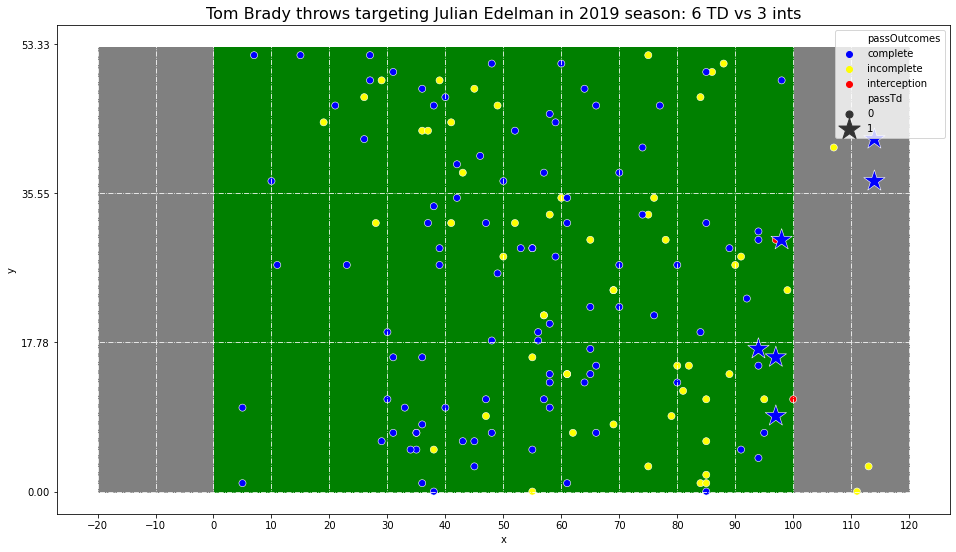

In [74]:
qb = 'Tom Brady'
receiver = 'Julian Edelman'

throws = get_all_throws_intended_to_receiver(multi_index_data, 2019, qb, receiver)

display(throws.sample(5))

plot_throws_in_field(throws, qb, receiver)

passOutcomes passDirection  passLength  \
qbName          playId                                            
Jimmy Garoppolo 15047210     complete         right          -3   
                15075859   incomplete         right           4   
                15049240     complete        middle           9   
                15079865     complete          left          13   
                15071429     complete        middle          -4   

                           receiverName  passTd  passInt  distanceToGoalPre  \
qbName          playId                                                        
Jimmy Garoppolo 15047210  George Kittle       0        0               63.0   
                15075859  George Kittle       0        0                4.0   
                15049240  George Kittle       1        0               30.0   
                15079865  George Kittle       0        0               91.0   
                15071429  George Kittle       0        0               79.0   

                              x   y  
qbName          playId               
Jimmy Garoppolo 15047210   34.0  11  
                15075859  104.0   1  
                15049240   79.0  23  
                15079865   22.0  38  
                15071429   17.0  21

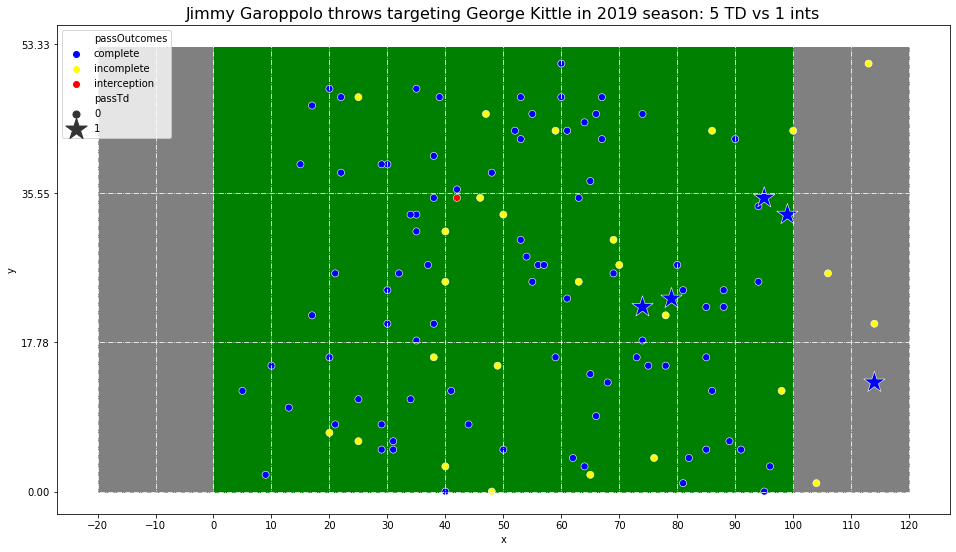

In [75]:
qb = 'Jimmy Garoppolo'
receiver = 'George Kittle'

throws = get_all_throws_intended_to_receiver(multi_index_data, 2019, qb, receiver)

display(throws.sample(5))

plot_throws_in_field(throws, qb, receiver)

## ANEXO 1 - receiver.csv<a name="anexo">

Importamos el conjunto de datos de **receiver.csv** como un Dataframe de Pandas

In [76]:
path_receptions = path.join('archive', 'receiver.csv')
receptions_corrupted = pd.read_csv(path_receptions, sep=',', index_col=0)

Número de recepciones durante las temporadas 2005-2019 (supuestamente)

In [77]:
print(receptions_corrupted.shape[0])


350924


In [78]:
print(receptions_corrupted.index.unique().size)

182633


Eliminamos duplicados:

In [79]:
receptions_corrupted.drop_duplicates(inplace=True)
print(receptions_corrupted.shape[0])

182633


Con el objetivo de agrupar las recepciones válidas por temporada, importamos los datos de **games.csv** y **plays.csv**

In [80]:
path_games = path.join('archive', 'games.csv')
games_df_anexo = pd.read_csv(path_games, sep=',', index_col=0)[['season']]

path_plays = path.join('archive', 'plays.csv')
plays_df_anexo = pd.read_csv(path_plays, sep=',', index_col=0)[['gameId']]

In [81]:
plays_by_game = plays_df_anexo.merge(games_df_anexo, how='left', left_on='gameId', right_index=True)

In [82]:
receptions_by_game = receptions_corrupted.merge(plays_by_game, how='left', 
                                                left_on='playId', right_index=True)

Agrupamos las jugadas de recepción por temporada ('season')

In [83]:
receptions_by_game['season'].value_counts()

2014    24050
2017    23563
2019    23372
2010    23132
2007    22479
2005    22379
2004    22026
2006    21632
Name: season, dtype: int64

En resumen, únicamente disponemos de valores válidos para las temporadas 2014, 2017, 2019, 2010, 2007, 2005, 2004, 2006. El número de datos es razonable y constante para cada una de esas temporadas, por lo que los datos de este conjunto se usarán a lo largo del trabajo. No obstante, se decartarán siempre del análisis las temporadas que no pertencen a este grupo.